In [0]:
%matplotlib inline
from keras.models import Sequential                                    # Using Sequential API
from keras.layers import Dense                                         
from keras.datasets import mnist                                       # Inbuilt MNIST Dataset
from keras.utils import *
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


In [0]:
def get_model(x_train,y_train,x_test,y_test):
  
  model = Sequential()                                                 
  model.add(Dense(512, input_shape=(x_train.shape[1],),activation='relu'))                             # Input layer size = 784, Hidden Layer 1 
  model.add(Dense(512, activation='relu'))                                                             # Hidden Layer 2 (Fully connected layers)
  model.add(Dense(10, activation='softmax'))                                                           # Output Layer size = 10 classes
  model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])       
  print("\n Model Summary \n")
  model.summary()
  
  print("\n Model Training \n")
  history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size =128, verbose=2) #Training the model (epochs, batch_size = hyperparameters)
                    
  plt.plot(history.history['acc'])                                                                      # summarize history for accuracy
  plt.plot(history.history['val_acc'])
  plt.title('\n Model Accuracy \n')
  plt.ylabel('accuracy') 
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

  plt.plot(history.history['loss'])                                                                       # summarize history for loss
  plt.plot(history.history['val_loss'])
  plt.title('\n Model Loss \n')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  
  return model            

In [0]:
def train_model():
  
  (x_train, y_train), (x_test, y_test) = mnist.load_data()
  x_train = x_train.reshape(60000,784)                            # As input is a vector = 28 * 28 pixel size  = 784
  x_test = x_test.reshape(10000,784)
  x_train = x_train.astype('float32')
  x_test = x_test.astype('float32')
  x_train /= 255                                                  # Grayscale (0-255), convert into [0,1]
  x_test /= 255
  digits = 10
  y_train = to_categorical(y_train,digits)                        # Target values not taken as numerical values; as different items(one-hot encoded vectors)
  y_test = to_categorical(y_test,digits)
  
  model = get_model(x_train,y_train,x_test,y_test)                # Function call for training
  y_test_pred = model.predict(x_test)                             # Testing
  
  print("\n Some Outputs\n")
  for i in range(10):                                             # Print first 10 test images with output classes 
    img = x_test[i].reshape((28,28))
    plt.imshow(img, cmap="Greys")
    plt.show()
    print("Target Value",np.argmax(y_test_pred[i]))
  
  acc = model.evaluate(x_test,y_test,verbose=2)                   # Evaluation of model
  print('\n TEST ACCURACY: ',acc[1])
  
  return model


 Model Summary 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________

 Model Training 

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 10s - loss: 0.2202 - acc: 0.9358 - val_loss: 0.1003 - val_acc: 0.9675
Epoch 2/10
 - 10s - loss: 0.0784 - acc: 0.9765 - val_loss: 0.0664 - val_acc: 0.9795
Epoch 3/10
 - 9s - loss: 0.0509 - acc: 0.9839 - val_loss: 0.0702 - val_acc: 0.9777
Epoch 4/10
 - 9s - loss: 0.0346 - acc: 0.9884 - val_loss: 0.07

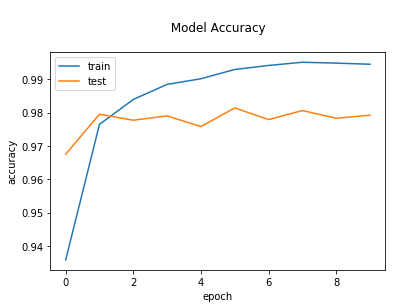

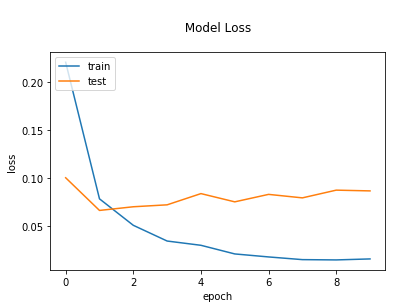


 Some Outputs



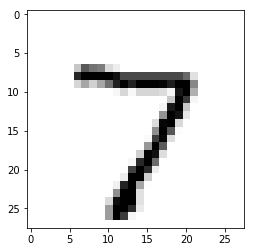

Target Value 7


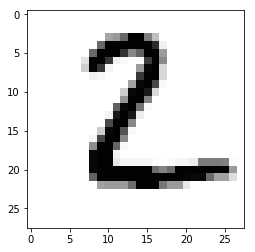

Target Value 2


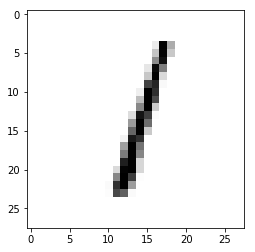

Target Value 1


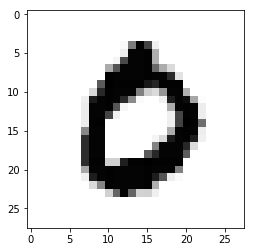

Target Value 0


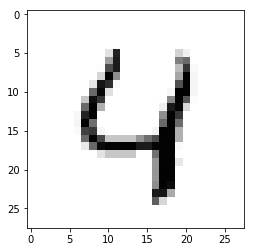

Target Value 4


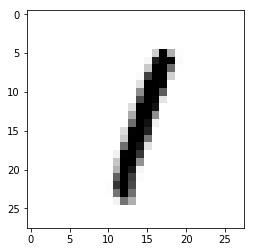

Target Value 1


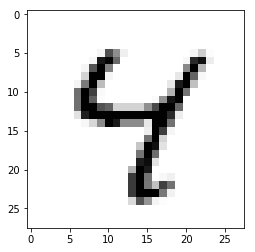

Target Value 4


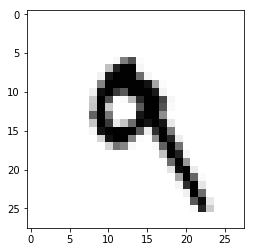

Target Value 9


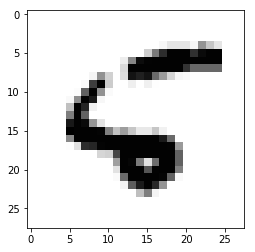

Target Value 5


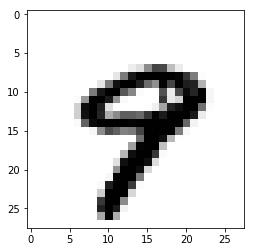

Target Value 9

TEST ACCURACY:  0.9792


In [0]:
train_model()